# Loan Prediction

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [102]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
train_  = train.copy()
test_data_  = test_data.copy()

In [104]:
print(train.dtypes, "\n\ntrain.shape: ", train.shape, "\n\ntest.shape: ", test_data.shape)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object 

train.shape:  (614, 13) 

test.shape:  (367, 12)


In [105]:
dataset = pd.concat([train,test_data], axis = 0).reset_index(drop = True)
dataset = dataset.fillna(np.nan)
dataset.shape

(981, 13)

Catgorical, ordinal and Nominal Variables

### Categorical

In [106]:
train[train["Loan_Status"] == "Y"]["Gender"].value_counts()

Male      339
Female     75
Name: Gender, dtype: int64

In [107]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
type_ = ["Y", "N"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=train['Loan_Status'].value_counts(), name="Loan_Status"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Loan approval status",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='loan_status', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

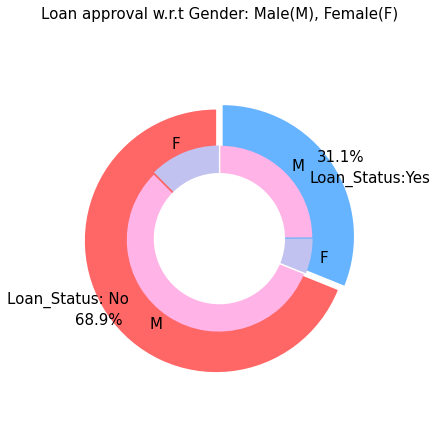

In [108]:
plt.figure(figsize=(6, 6))
labels =["Loan_Status: No","Loan_Status:Yes"]
values = [train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Female + train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Male,
          train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Female + train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Male]
labels_gender = ["F","M","F","M"]
sizes_gender = [train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Female,
                train.Loan_Status[train.Loan_Status == "Y"].groupby(by = train.Gender).count().Male,
                train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Female,
                train.Loan_Status[train.Loan_Status == "N"].groupby(by = train.Gender).count().Male]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Loan approval w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

### Ordinal

In [109]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Dependents", color="Loan_Status", barmode="group", title="<b>Loan approval based on Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [110]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Loan_Status", color="Education", barmode="group", title="<b>Loan approval based on Education</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [111]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Loan_Status", color="Property_Area", barmode="group", title="<b>Loan approval based on property area</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [112]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Married", color="Loan_Status", barmode="group", title="<b>Loan approval based on Marital status</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [113]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Self_Employed", color="Loan_Status", barmode="group", title="<b>Loan approval based on Self employment status</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Numerical independent variable vs target variable

In [114]:
def kdeplot(param, x_title):
    
    sns.set_context("paper",font_scale=1.1)
    ax = sns.kdeplot(param[(train["Loan_Status"] == 'N') ],
                color="Red", shade = True);
    ax = sns.kdeplot(param[(train["Loan_Status"] == 'Y') ],
                ax =ax, color="Blue", shade= True);
    ax.legend(["Not approved","approved"],loc='upper right');
    ax.set_ylabel('Density');
    ax.set_xlabel(x_title);
    ax.set_title("Distribution of " + x_title +" by loan approval status");

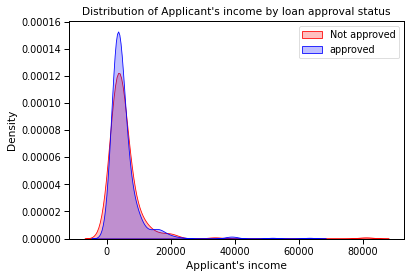

In [115]:
kdeplot(train.ApplicantIncome, "Applicant's income")

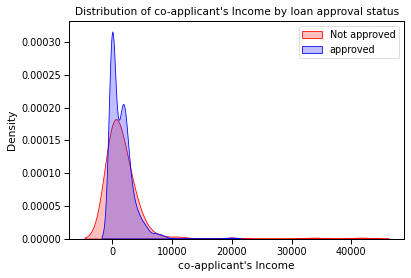

In [116]:
kdeplot(train.CoapplicantIncome, "co-applicant's Income")

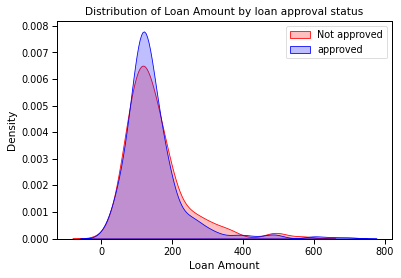

In [117]:
kdeplot(train.LoanAmount, "Loan Amount")

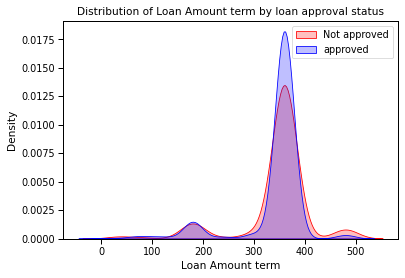

In [118]:
kdeplot(train.Loan_Amount_Term, "Loan Amount term")

In [119]:
train.ApplicantIncome.values.min()

150

Applicant's Income

In [120]:
train["ApplicantIncome_"] = list(map(lambda x: 'Low' if x <= 2500 
         else('Medium' if (x > 2500 and x <= 4000) 
              else('High' if (x > 4000 and x <= 6000) else 'Very High')), train.ApplicantIncome))

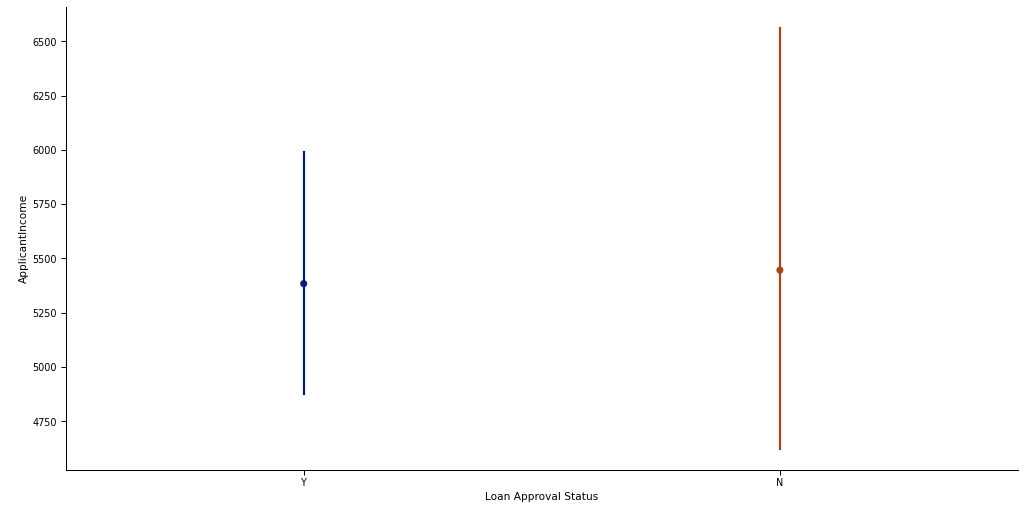

In [121]:
sns.factorplot(y ="ApplicantIncome", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\nApplicantIncome")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [122]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="ApplicantIncome_", color="Loan_Status", barmode="group", title="<b>Loan approval based on Applicant's Income</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Applicant's income does not affect the chances of Loan approval

In [123]:
train["CoapplicantIncome_"] = list(map(lambda x: 'Low' if x <= 1000 
                                   else('High' if (x > 1000 and x <= 3000) else 'Very High'), train.CoapplicantIncome))

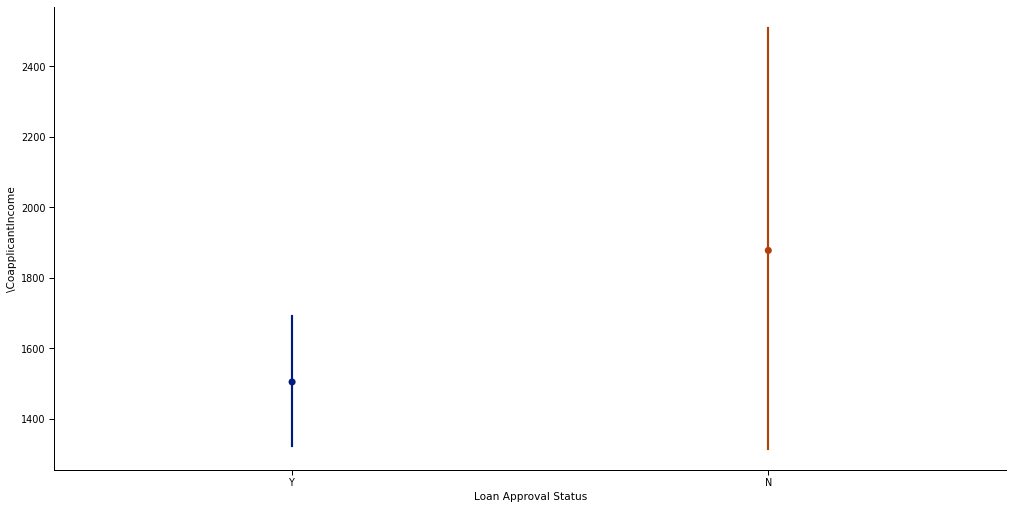

In [124]:
sns.factorplot(y ="CoapplicantIncome", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\CoapplicantIncome")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [125]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="CoapplicantIncome_", color="Loan_Status", title="<b>Loan approval based on Co-Applicant's Income</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

It shows that if applicants income is less then chances of Loan approval are high. But most of the applicants don't have co-ccplicants hence the value is 0 in that case. Hence this finding is not promising.<br>

Let compbine Applicant's and Co-applicant's income and see the the effect of Total income on Loan approval Status

In [126]:
train["Total_income"] = train.ApplicantIncome + train.CoapplicantIncome

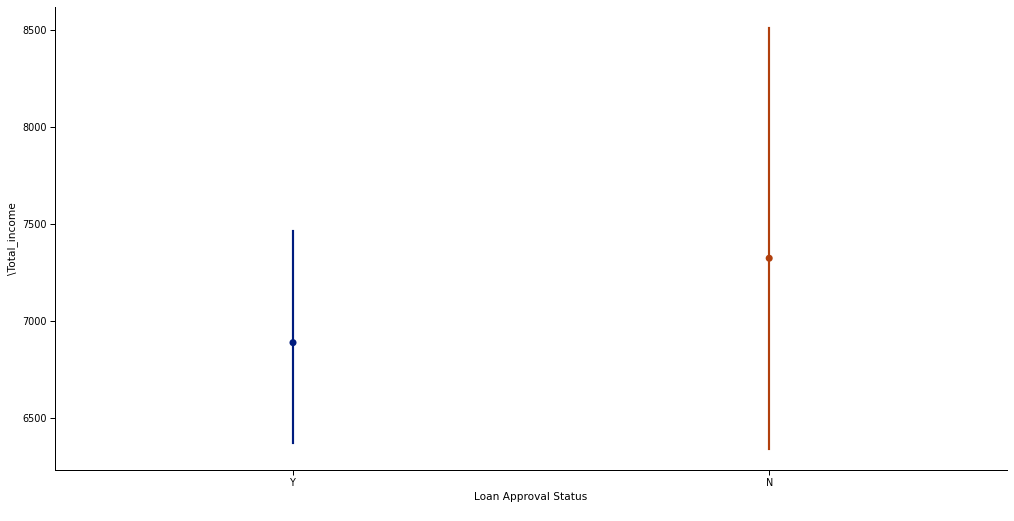

In [127]:
sns.factorplot(y ="Total_income", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\Total_income")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [128]:
train["Total_income_"]= list(map(lambda x: 'Low' if x <= 2500 
         else('Medium' if (x > 2500 and x <= 4000) 
              else('High' if (x > 4000 and x <= 6000) else 'Very High')), train.Total_income))

In [129]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="Total_income_", color="Loan_Status", title="<b>Loan approval based on Total Income</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Loan Amount

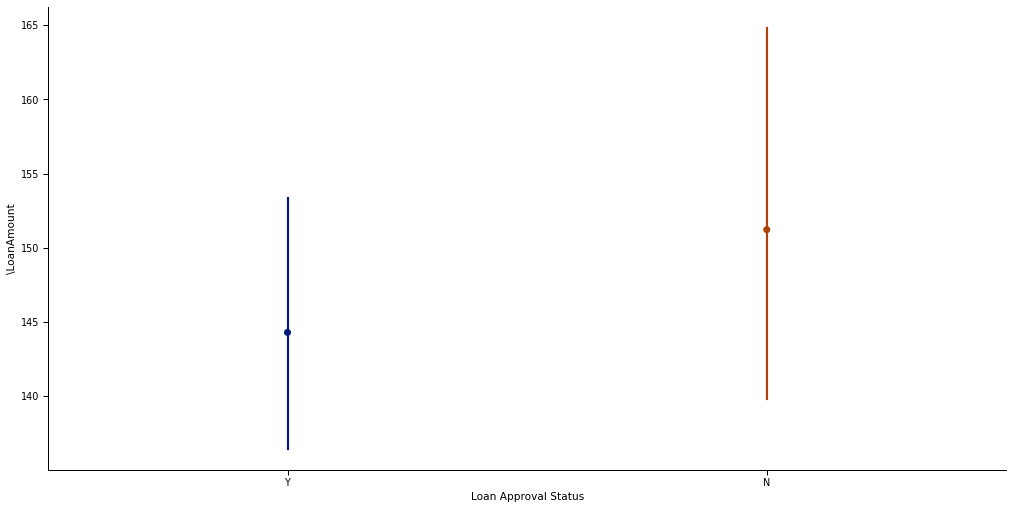

In [130]:
sns.factorplot(y ="LoanAmount", size = 7, aspect = 2, data = train, x= "Loan_Status", palette = "dark")
plt.ylabel("\LoanAmount")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [131]:


train["LoanAmount_"]= list(map(lambda x: 'Low' if x <= 100 
         else('High' if (x > 100 and x <= 200) 
              else('Very High' if (x > 200) else 'Other')), train.LoanAmount))

In [132]:
# Other for null vals
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(train, x="LoanAmount_", color="Loan_Status",  title="<b>Loan approval based on Loan Amount</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [133]:
# let's drop all the created variables
train =train.drop(['ApplicantIncome_', 'CoapplicantIncome_', 'Total_income', 'Total_income_', 'LoanAmount_'], axis = 1)

In [134]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [135]:
train["Dependents"].replace("3+", 3, inplace = True)
test_data["Dependents"].replace("3+", 3, inplace = True)

train["Loan_Status"].replace("N", 0, inplace = True)
train["Loan_Status"].replace("Y", 1, inplace = True)

train['CoapplicantIncome'].replace(0, np.nan, inplace=True)
test_data['CoapplicantIncome'].replace(0, np.nan, inplace=True)

In [158]:
train_["Loan_Status"].replace("N", 0, inplace = True)
train_["Loan_Status"].replace("Y", 1, inplace = True)

#### Correlation between numerical variables

In [136]:
matrix = train.corr()

<AxesSubplot:>

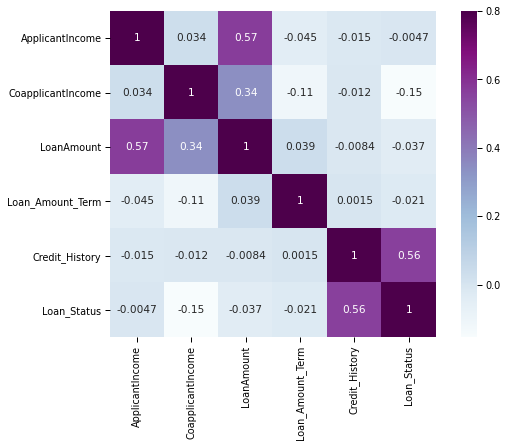

In [137]:
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu", annot = True)

### Missing Value Imputation

In [138]:
train.drop(["Loan_ID"], axis = 1)
test_data.drop(["Loan_ID"], axis = 1)
train.drop("Loan_Status", axis =1)
train = pd.get_dummies(train)
test_data = pd.get_dummies(test_data)

In [139]:
missing_values = pd.DataFrame(train.isnull().sum())
missing_values.columns = ["missing_values"]

missing_values_test = pd.DataFrame(test_data.isnull().sum())
missing_values_test.columns = ["missing_values"]

In [140]:
missing_values.sort_values(by = "missing_values", ascending=False)


,missing_values
CoapplicantIncome,273
Credit_History,50
LoanAmount,22
Loan_Amount_Term,14
ApplicantIncome,0
...,...
Loan_ID_LP001699,0
Loan_ID_LP001702,0
Loan_ID_LP001708,0
Loan_ID_LP001711,0


In [141]:
missing_values_test.sort_values(by = "missing_values", ascending=False)

,missing_values
CoapplicantIncome,156
Credit_History,29
Loan_Amount_Term,6
LoanAmount,5
ApplicantIncome,0
...,...
Loan_ID_LP001652,0
Loan_ID_LP001651,0
Loan_ID_LP001650,0
Loan_ID_LP001627,0


In [142]:
"""
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
"""

'\ntrain["Gender"].fillna(train["Gender"].mode()[0], inplace=True)\ntrain["Married"].fillna(train["Married"].mode()[0], inplace=True)\ntrain["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)\ntrain["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)\ntrain["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)\n'

In [143]:
"""test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0], inplace=True)"""

'test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0], inplace=True)'

In [144]:
## KNNImputer

from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=10)
train = imputer.fit_transform(train[["CoapplicantIncome", "Credit_History", 
                                     "Loan_Amount_Term", "LoanAmount"]])

test_data = imputer.fit_transform(test_data[["CoapplicantIncome", "Credit_History", 
                                     "Loan_Amount_Term", "LoanAmount"]])


value of 360 is repeating most of the times

In [160]:
X = train
y = train_.Loan_Status

In [161]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [162]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [163]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
#models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
#models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("XGBoost", XGBClassifier()))

In [195]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [164]:

names = []
acc_results = []
test_labels = []
roc_auc_results = []
models_fit = []
for name, model in models:
    print(name)
    names.append(name)
    model_ = model.fit(X_train,y_train)
    models_fit.append(model_)
    
    acc = model_.score(X_cv, y_cv)
    acc_results.append(acc)
    
    test_ = model_.predict_proba(np.array(X_cv))
    test_ = test_[:, 1]
    test_labels.append(test_)
    
    roc_auc = roc_auc_score(y_cv, test_, multi_class='ovo', average='weighted')
    roc_auc_results.append(roc_auc)

Logistic Regression
KNN
Gaussian NB
Decision Tree Classifier
Random Forest
Adaboost
Gradient boost classifier
XGBoost
[22:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [165]:
list_ = list(zip(names, acc_results, roc_auc_results))
model_results_df = pd.DataFrame(list_,
                  columns = ['Model', 'Accuracy', "ROC_AUC"])

In [166]:
model_results_df.sort_values(by = "Accuracy", ascending=False)

,Model,Accuracy,ROC_AUC
2,Gaussian NB,0.810811,0.684700
0,Logistic Regression,0.800000,0.709137
7,XGBoost,0.794595,0.693117
5,Adaboost,0.783784,0.690266
6,Gradient boost classifier,0.772973,0.688162
4,Random Forest,0.762162,0.711920
3,Decision Tree Classifier,0.697297,0.622862
1,KNN,0.637838,0.575550


In [167]:
fpr_lr, tpr_lr, _ = roc_curve(y_cv, test_labels[0])
fpr_knn, tpr_knn, _ = roc_curve(y_cv, test_labels[1])
fpr_gnb, tpr_gnb, _ = roc_curve(y_cv, test_labels[2])
fpr_dt, tpr_dt, _ = roc_curve(y_cv, test_labels[3])
fpr_rf, tpr_rf, _ = roc_curve(y_cv, test_labels[4])
fpr_ada, tpr_ada, _ = roc_curve(y_cv, test_labels[5])
fpr_gb, tpr_gb, _ = roc_curve(y_cv, test_labels[6])
fpr_xgb, tpr_xgb, _ = roc_curve(y_cv, test_labels[7])

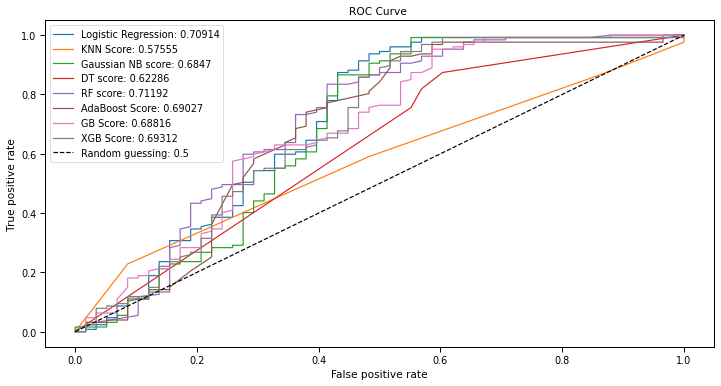

In [168]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression: ' + str(round(roc_auc_results[0], 5)))
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(roc_auc_results[1], 5)))
plt.plot(fpr_gnb, tpr_gnb, label = 'Gaussian NB score: ' + str(round(roc_auc_results[2], 5)))
plt.plot(fpr_dt, tpr_dt, label = 'DT score: ' + str(round(roc_auc_results[3], 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(roc_auc_results[4], 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(roc_auc_results[5], 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(roc_auc_results[6], 5)))
plt.plot(fpr_xgb, tpr_xgb, label = 'XGB Score: ' + str(round(roc_auc_results[7], 5)))

plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

### Optimization 

In [169]:
## Cross Validation Scores

# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def CrossValidationDict(models_list, scr, X_train = X, y_cv = y, cv = 5):
    cvDict = {}
    for mo in models_list:
        cvScore = cross_val_score(mo, X_train, y_cv, cv = cv, scoring = scr)
        
        cvDict[str(mo).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [170]:
CrossValidationDict(models_fit, scr = 'roc_auc')

[22:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'LogisticRegression': [0.7283703035870218, 0.04676781543409788],
 'KNeighborsClassifier': [0.5235283060592659, 0.046413298514538334],
 'GaussianNB': [0.6906953658656445, 0.05270309148117042],
 'DecisionTreeClassifier': [0.6726131599738411, 0.040057655775073385],
 'RandomForestClassifier': [0.7307822724231393, 0.057326139718518694],
 'AdaBoostClassifier': [0.7009450001323067, 0.04933617151912804],
 'GradientBoostingClassifier': [0.6997079709076613, 0.06236805864274935],
 'XGBClassifier': [0.7247474738883408, 0.054509359378854094]}

In [171]:
CrossValidationDict(models_fit, scr = 'accuracy')

[22:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'LogisticRegression': [0.7801412768226041, 0.02945067493434803],
 'KNeighborsClassifier': [0.6530987604958016, 0.04095523084475143],
 'GaussianNB': [0.7964414234306278, 0.02846093668748405],
 'DecisionTreeClassifier': [0.6906037584966013, 0.030815609139694077],
 'RandomForestClassifier': [0.7410502465680394, 0.022543967925961923],
 'AdaBoostClassifier': [0.791536718645875, 0.030199217684751926],
 'GradientBoostingClassifier': [0.7850459816073571, 0.0356773863339701],
 'XGBClassifier': [0.7394242303078769, 0.03401901465246312]}

### Hyper Parameter Tuning

#### ADABOOST

In [172]:

ABC = AdaBoostClassifier()

ABC_param_grid = {"algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :list(range(100, 700, 10)),
                  "learning_rate":  [0.001, 0.01, 0.1, 0.11,0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose =3)

gsABC.fit(X_train,y_train)

ada_best = gsABC.best_estimator_

gsABC.best_score_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:   21.3s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 2036 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 2580 tasks      | elapsed:  9.7min
[Parallel(n_jobs=6)]: Done 3000 out of 3000 | elapsed: 11.7min finished


0.8088372093023256

In [175]:
gsABC.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, n_estimators=100)

In [176]:
gsABC.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 100}

### GradientBoost

In [174]:
# Gradient Boost

GBM = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],
                 'n_estimators' : list(range(100,700,100)),
                 'learning_rate': [0.01,0.1,0.11],
                 'max_depth': [2,3,4,5,6,7,8,9,10],
                 'min_samples_leaf': [30,40],
                 'max_features': [0.6,0.7,0.8]}

gsGBC = GridSearchCV(GBM, param_grid = gb_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsGBC.fit(X_train,y_train)

gbm_best = gsGBC.best_estimator_

gsGBC.best_score_


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 230 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 480 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 830 tasks      | elapsed:   58.1s
[Parallel(n_jobs=6)]: Done 1280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1830 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 2480 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 3230 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 4080 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 4860 out of 4860 | elapsed:  6.5min finished


0.8111901504787962

In [177]:
# XGBOOSt
XGB = XGBClassifier()

xgb_param_grid = {'learning_rate': [0.01,0.1,0.11], 
                  'max_depth': [4,5,6,7],
                  'n_estimators': [50,100,200,400,500,550], 
                  'gamma': [0,1,5,8],
                  'subsample': [0.8,0.95,1.0]}

gsXBC = GridSearchCV(XGB, param_grid = xgb_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsXBC.fit(X_train,y_train)

xgb_best = gsXBC.best_estimator_

gsXBC.best_score_


Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 10.3min


[23:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=6)]: Done 4320 out of 4320 | elapsed: 10.9min finished


0.8088372093023256

In [236]:
# Logistic Regression

grid={"C":np.logspace(0.1,0.4,4), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=0, solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring = "accuracy", n_jobs =6,verbose = 1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
tuned hpyerparameters :(best parameters)  {'C': 1.5848931924611136, 'penalty': 'l2'}
accuracy : 0.8135658914728682


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.0s finished


In [208]:
#Random Forest

rf_test = {"max_depth": [3,4,5],
           "n_estimators" :[100,300,500,600],
           "min_samples_leaf":[10,15]}

tuning = GridSearchCV(RandomForestClassifier(), param_grid = rf_test, scoring = 'accuracy', n_jobs = 6)




In [209]:
tuning.fit(X_train,y_train)

rf_best = tuning.best_estimator_

tuning.best_score_

0.8088372093023256

In [207]:
tuning.best_params_

{'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 100}

In [196]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8757575757575758
Train Accuracy  0.8088578088578089
Validation Mean F1 Score:  0.7298838994138311
Validation Mean Accuracy:  0.8088372093023256


In [215]:
#Decision tree classifier


tree_param = {'criterion': ['entropy', 'gini'], 
               'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             "min_samples_leaf":list(range(1,80,3))}
              
gsDTC = GridSearchCV(DecisionTreeClassifier(), param_grid = tree_param, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsDTC.fit(X_train,y_train)

dtc_best = gsDTC.best_estimator_

gsDTC.best_score_


Fitting 5 folds for each of 756 candidates, totalling 3780 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3694 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 3780 out of 3780 | elapsed:    6.1s finished


0.8088372093023256

In [190]:
#GaussianNB


gnb_clf = GaussianNB()
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf = GridSearchCV(gnb_clf, parameters, cv=5, verbose=1, n_jobs=6, scoring = "accuracy")
clf.fit(X_train, y_train)
#plot_grid_search(clf)
#table_grid_search(clf)
clf_best = clf.best_estimator_

clf.best_score_


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   29.2s
[Parallel(n_jobs=6)]: Done  70 out of  70 | elapsed:   29.5s finished


0.8088645690834474

In [192]:
#knn

param_grid_knn = {"n_neighbors": list(range(1,200))}

gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=1, n_jobs=6, scoring = "accuracy")
gs_knn.fit(X_train, y_train)

knn_best = gs_knn.best_estimator_

gs_knn.best_score_


Fitting 5 folds for each of 199 candidates, totalling 995 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 364 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 864 tasks      | elapsed:   14.2s
[Parallel(n_jobs=6)]: Done 995 out of 995 | elapsed:   16.2s finished


0.6876607387140903

In [330]:
gs_knn.best_params_

{'n_neighbors': 29}

In [193]:
#Extratrees
ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth": [3, 4, 5],
                 "max_features": [3, 10, 15],
                 "min_samples_split": [2, 3, 4],
                 "min_samples_leaf": [1, 2],
                 "bootstrap": [False,True],
                 "n_estimators" :[100,200,300],
                 "criterion": ["gini","entropy"]}

gsExtC = GridSearchCV(ExtC, param_grid = ex_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsExtC.fit(X_train,y_train)

ext_best = gsExtC.best_estimator_

gsExtC.best_score_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   22.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 3240 out of 3240 | elapsed:  6.5min finished


0.8088372093023256

## Voting Classifier

In [237]:
voting = VotingClassifier(estimators=[('abc', gsABC.best_estimator_), 
                                      ('lr',logreg_cv.best_estimator_),
                                      ('xgb',gsXBC.best_estimator_),
                                      ('gbc',gsGBC.best_estimator_),
                                      ('gnb',clf_best),
                                      ('dtc',dtc_best),
                                     ("ext",ext_best)])

v_param_grid = {'voting':['soft']} # tuning voting parameter

gsV = GridSearchCV(voting, 
                   param_grid = v_param_grid, cv = 5, 
                   scoring = "accuracy",
                   n_jobs = 6, 
                   verbose = 1)

gsV.fit(X_train,y_train)

v_best = gsV.best_estimator_

gsV.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.6s finished


[00:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8088372093023256

In [238]:
models_tuned = [gsABC.best_estimator_, gs_knn.best_estimator_, clf.best_estimator_, gsDTC.best_estimator_, 
                tuning.best_estimator_, logreg_cv.best_estimator_, gsXBC.best_estimator_, gsGBC.best_estimator_,ext_best, v_best]
model_names= ["Adaboost", "KNN", "GaussianNB", "Decision Trees", "Random Forest", "Logistic Regression", 
              "XGBoost", "GradientBoost","ExtraTrees", "Voting_classifier"]


names = []
acc_results = []
test_labels = []
roc_auc_results = []
models_fit = []

for name, model in zip(model_names,models_tuned):
    print(name)
    names.append(name)
    model_ = model.fit(X_train,y_train)
    models_fit.append(model_)
    
    acc = model_.score(X_cv, y_cv)
    acc_results.append(acc)
    
    test_ = model_.predict_proba(np.array(X_cv))
    test_ = test_[:, 1]
    test_labels.append(test_)
    
    roc_auc = roc_auc_score(y_cv, test_, multi_class='ovo', average='weighted')
    roc_auc_results.append(roc_auc)

Adaboost
KNN
GaussianNB
Decision Trees
Random Forest
Logistic Regression
XGBoost
[00:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
GradientBoost
ExtraTrees
Voting_classifier
[00:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [239]:
list_tuned = list(zip(names, acc_results, roc_auc_results))
model_tuned_df = pd.DataFrame(list_tuned,
                  columns = ['Model', 'Accuracy', "ROC_AUC"])

In [240]:
model_tuned_df.sort_values(by = "Accuracy", ascending=False)

,Model,Accuracy,ROC_AUC
5,Logistic Regression,0.816216,0.693660
0,Adaboost,0.810811,0.702960
2,GaussianNB,0.810811,0.684700
3,Decision Trees,0.810811,0.708526
4,Random Forest,0.810811,0.729636
6,XGBoost,0.810811,0.758756
8,ExtraTrees,0.810811,0.737103
9,Voting_classifier,0.810811,0.741447
7,GradientBoost,0.789189,0.787334
1,KNN,0.686486,0.482283


In [241]:
def predict_results(classifier, output_fileName):
    predict_results = classifier.predict(test_data)
    submission = pd.read_csv("sample_submission.csv")
    submission["Loan_Status"] = predict_results
    submission["Loan_ID"] = test_data_["Loan_ID"]
    submission["Loan_Status"].replace(0, "N", inplace = True)
    submission["Loan_Status"].replace(1, "Y", inplace = True)
    pd.DataFrame(submission, columns=["Loan_ID", "Loan_Status"]).to_csv(output_fileName)

In [205]:
# Adaboost classifier results
predict_results(gsABC.best_estimator_, "Adaboost_output.csv")

In [243]:
# Gradientboosting classifier result
predict_results(gsGBC.best_estimator_, "GradientBoosting_output_.csv")

In [310]:
# XGBOOST classifier result
predict_results( gsXBC.best_estimator_, "XGBoost_output.csv")

In [204]:
# Logistic Regression result
predict_results(logreg_cv.best_estimator_, "LogisticRegression_output.csv")

In [312]:
# Random Forest result
predict_results(tuning.best_estimator_, "RandomForest_output.csv")

In [206]:
# GaussianNB Classifier result
predict_results(clf.best_estimator_, "GNB_output_.csv")


In [242]:
# Voting classifier
predict_results(v_best, "voting_classifier_.csv")


In [331]:
predict_results(knn_best, "KNN.csv")

In [337]:
predict_results(ext_best, "extratrees.csv")